# Import Necessary library

In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.preprocessing import StandardScaler

# Reading the Data

In [21]:
df = pd.read_csv('dignous.csv')

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Explore the Data

In [22]:
df.shape

(569, 33)

In [23]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [26]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [27]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [28]:
df.duplicated().sum()

0

 # Cleaning the Data

In [29]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**i will drop id and unknown columns from data**

In [30]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Analysis and Visualization

In [32]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
diagnosis = df['diagnosis'].value_counts().reset_index()
diagnosis

,index,diagnosis
0,B,357
1,M,212


In [34]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [35]:
Dimensions = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].sum().reset_index()
Dimensions

,index,0
0,radius_mean,8038.429000
1,texture_mean,10975.810000
2,perimeter_mean,52330.380000
3,area_mean,372631.900000
4,smoothness_mean,54.829000
5,compactness_mean,59.370020
6,concavity_mean,50.526811
7,concave points_mean,27.834994
8,symmetry_mean,103.081100
9,fractal_dimension_mean,35.731840


In [36]:
Dimensions.rename(columns={
    'index' : 'Dimensions',
    0 : 'Sum of Dimensions'
},inplace=True)

In [37]:
Dimensions

,Dimensions,Sum of Dimensions
0,radius_mean,8038.429000
1,texture_mean,10975.810000
2,perimeter_mean,52330.380000
3,area_mean,372631.900000
4,smoothness_mean,54.829000
5,compactness_mean,59.370020
6,concavity_mean,50.526811
7,concave points_mean,27.834994
8,symmetry_mean,103.081100
9,fractal_dimension_mean,35.731840


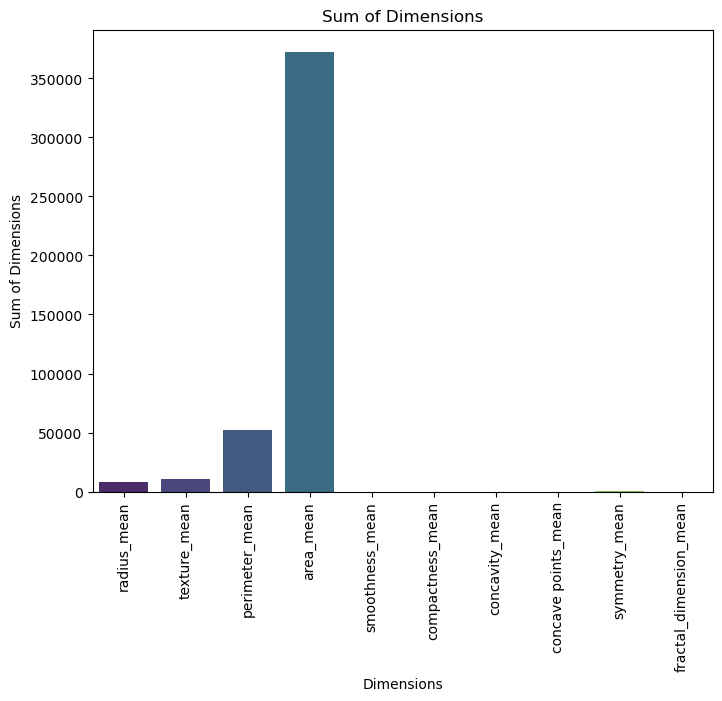

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Dimensions', y='Sum of Dimensions', data=Dimensions, palette='viridis')
plt.xlabel('Dimensions')
plt.xticks(rotation=90)
plt.ylabel('Sum of Dimensions')
plt.title('Sum of Dimensions')
plt.show()

In [39]:
Properties = df[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']].sum().reset_index()
Properties

,index,0
0,radius_se,230.542900
1,texture_se,692.389600
2,perimeter_se,1630.787700
3,area_se,22951.798000
4,smoothness_se,4.006317
5,compactness_se,14.497061
6,concavity_se,18.147525
7,concave points_se,6.712002
8,symmetry_se,11.688568
9,fractal_dimension_se,2.159300


In [40]:
Properties.rename(columns={
    'index' : 'Properties',
    0 : 'Sum of Properties'
},inplace=True)

In [41]:
Properties

,Properties,Sum of Properties
0,radius_se,230.542900
1,texture_se,692.389600
2,perimeter_se,1630.787700
3,area_se,22951.798000
4,smoothness_se,4.006317
5,compactness_se,14.497061
6,concavity_se,18.147525
7,concave points_se,6.712002
8,symmetry_se,11.688568
9,fractal_dimension_se,2.159300


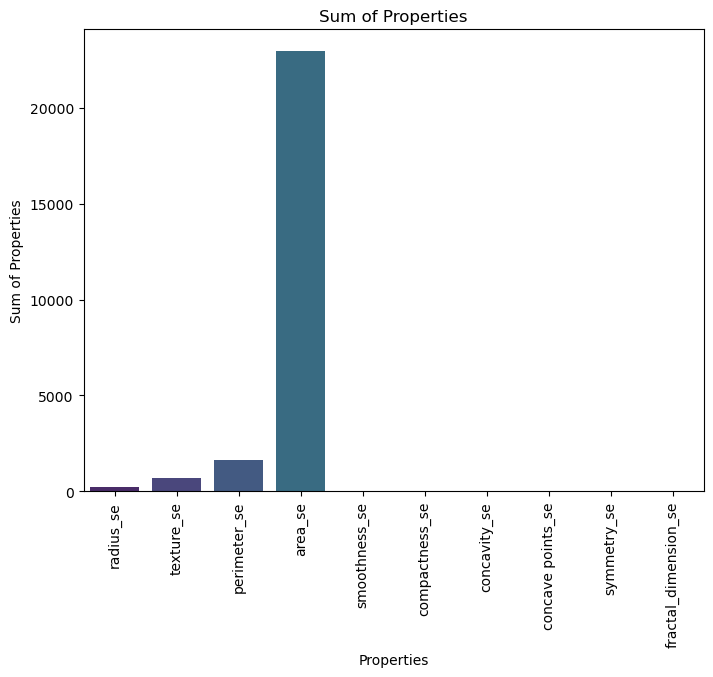

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Properties', y='Sum of Properties', data=Properties, palette='viridis')
plt.xlabel('Properties')
plt.xticks(rotation=90)
plt.ylabel('Sum of Properties')
plt.title('Sum of Properties')
plt.show()

In [43]:
The_worst_dimensions = df[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].sum().reset_index()
The_worst_dimensions

,index,0
0,radius_worst,9257.169000
1,texture_worst,14610.340000
2,perimeter_worst,61031.630000
3,area_worst,501051.800000
4,smoothness_worst,75.317730
5,compactness_worst,144.676810
6,concavity_worst,154.875247
7,concave points_worst,65.210941
8,symmetry_worst,165.053000
9,fractal_dimension_worst,47.765170


In [44]:
The_worst_dimensions.rename(columns={
    'index' : 'The_worst_dimensions',
    0 : 'Sum of The_worst_dimensions'
},inplace=True)

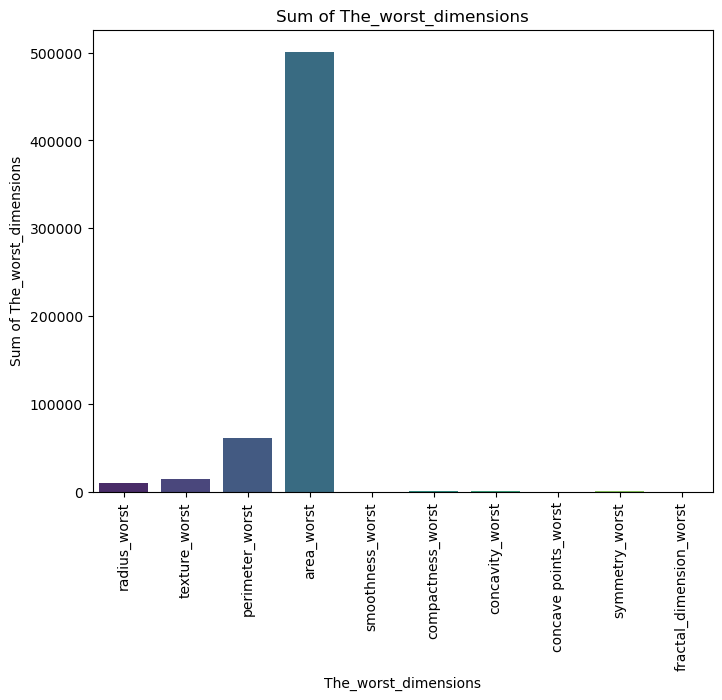

In [45]:
plt.figure(figsize=(8, 6))
sns.barplot(x='The_worst_dimensions', y='Sum of The_worst_dimensions', data=The_worst_dimensions, palette='viridis')
plt.xlabel('The_worst_dimensions')
plt.xticks(rotation=90)
plt.ylabel('Sum of The_worst_dimensions')
plt.title('Sum of The_worst_dimensions')
plt.show()

# Preprocessing 

In [46]:
labelencoder = LabelEncoder()

In [47]:
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])

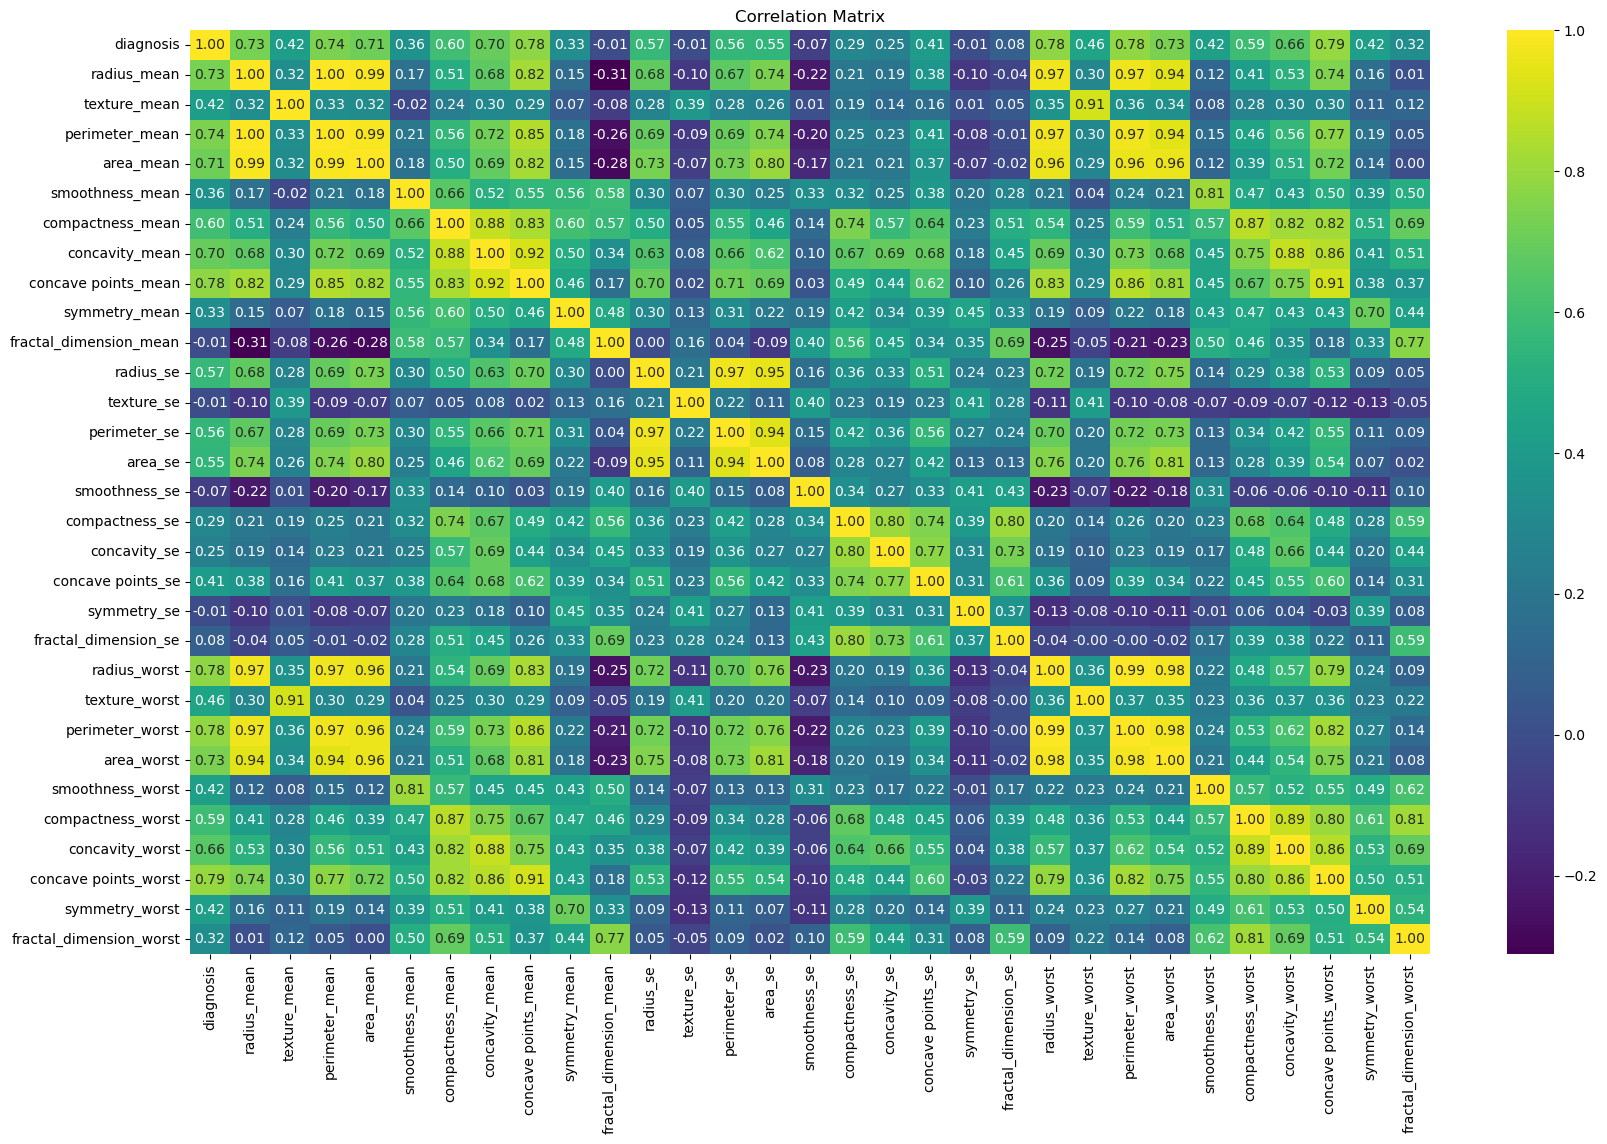

In [48]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**From the heatmap we can determine which column affect and which one not affect**

# Train Test Split

In [49]:
X = df.drop(columns='diagnosis',axis=1)
y = df['diagnosis']

In [50]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [51]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [52]:
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [53]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.025550,0.021790,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.1426,0.21870,0.116400,0.08263,0.3075,0.07351
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.178400,0.114400,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.53290,0.425100,0.19410,0.2818,0.10050
420,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,...,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.088170,0.029250,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.26490,0.377900,0.09594,0.2471,0.07463
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.038730,0.023770,0.1829,0.05667,...,13.88,22.00,90.81,600.6,0.1097,0.15060,0.176400,0.08235,0.3024,0.06949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.052590,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.291400,0.16090,0.3029,0.08216
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
277,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,19.96,24.30,129.00,1236.0,0.1243,0.11600,0.221000,0.12940,0.2567,0.05737
255,13.96,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.052460,0.1908,0.06130,...,16.39,22.07,108.10,826.0,0.1512,0.32620,0.320900,0.13740,0.3068,0.07957


In [54]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
465,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,0.06432,...,15.440,25.50,115.00,733.5,0.12010,0.56460,0.65560,0.13570,0.2845,0.12490
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
35,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.060180,0.1896,0.05656,...,20.010,29.02,133.50,1229.0,0.15630,0.38350,0.54090,0.18130,0.4863,0.08633
47,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400,0.2128,0.06777,...,15.670,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790
141,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.059430,0.1861,0.06248,...,19.920,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,12.900,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.030880,0.1778,0.06235,...,14.480,21.82,97.17,643.8,0.13120,0.25480,0.20900,0.10120,0.3549,0.08118
396,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,0.1806,0.06079,...,14.800,27.20,97.33,675.2,0.14280,0.25700,0.34380,0.14530,0.2666,0.07686
442,13.780,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,0.1405,0.05848,...,15.270,17.50,97.90,706.6,0.10720,0.10710,0.03517,0.03312,0.1859,0.06810
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.028720,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840


In [55]:
Y_train

415    0
256    1
420    0
448    0
195    0
      ..
16     1
58     0
277    1
255    1
320    0
Name: diagnosis, Length: 455, dtype: int64

In [56]:
y_test

465    0
561    0
35     1
47     1
141    1
      ..
143    0
396    0
442    0
71     0
437    0
Name: diagnosis, Length: 114, dtype: int64

## buliding NN Model


In [57]:
input_shape= X_train.shape[1]

In [58]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD,Adam

In [59]:
model = Sequential()
model.add(Dense(16, input_dim=(input_shape), activation='relu'))


model.add(Dense(8,  activation='relu'))



model.add(Dense(1, activation='sigmoid'))


/Users/mostafazaky/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [67]:
model.fit(X_train, Y_train,validation_data=( x_test,y_test) , epochs=150)


Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 0.3023 - val_accuracy: 0.9561 - val_loss: 0.1588
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9277 - loss: 0.1895 - val_accuracy: 0.8596 - val_loss: 0.3108
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.9386 - loss: 0.2162 - val_accuracy: 0.9649 - val_loss: 0.1608
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.9638 - loss: 0.0760 - val_accuracy: 0.9561 - val_loss: 0.1416
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.9264 - loss: 0.1730 - val_accuracy: 0.8772 - val_loss: 0.2913
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.9643 - loss: 0.0798 - val_accuracy: 0.9561 - val_loss: 0.1385
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9511 - loss: 0.1197 - val_accuracy: 0.9561 - val_loss: 0.1657
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.9556 - loss: 0.1350 - val_accuracy: 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.9664 - loss: 0.0903 - val_accuracy: 0.9649 - val_loss: 0.1486
Epoch 52/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.9445 - loss: 0.1076 - val_accuracy: 0.9474 - val_loss: 0.1469
Epoch 53/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.9537 - loss: 0.0875 - val_accuracy: 0.9386 - val_loss: 0.1669
Epoch 54/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.9514 - loss: 0.1077 - val_accuracy: 0.9474 - val_loss: 0.1551
Epoch 55/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.9588 - loss: 0.1059 - val_accuracy: 0.8860 - val_loss: 0.2742
Epoch 56/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9633 - loss: 0.1264 - val_accuracy: 0.9474 - val_loss: 0.1502
Epoch 57/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.9563 - loss: 0.0891 - val_accuracy: 0.9386 - val_loss: 0.1633
Epoch 58/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9648 - loss: 0.0766 - val_accuracy:

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9685 - loss: 0.0795 - val_accuracy: 0.9211 - val_loss: 0.2524
Epoch 102/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.9543 - loss: 0.1459 - val_accuracy: 0.9474 - val_loss: 0.1540
Epoch 103/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9409 - loss: 0.1108 - val_accuracy: 0.9649 - val_loss: 0.1542
Epoch 104/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.9546 - loss: 0.1042 - val_accuracy: 0.9561 - val_loss: 0.1493
Epoch 105/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.9723 - loss: 0.0610 - val_accuracy: 0.9474 - val_loss: 0.1982
Epoch 106/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9677 - loss: 0.0836 - val_accuracy: 0.9474 - val_loss: 0.1543
Epoch 107/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.9540 - loss: 0.1083 - val_accuracy: 0.9649 - val_loss: 0.1478
Epoch 108/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9595 - loss: 0.1008 - val_ac